# Forecasting Non-stationary Time Series

#### Loading Libraries

In [26]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Statistical Libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller

# Warning & Interator Optimizer
import warnings
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
from itertools import product
from typing import Union

#### Forecasting a Non-Stationary Time Series - Loading Data

In [3]:
df = pd.read_csv('/Users/isisromero/desktop/time_series/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


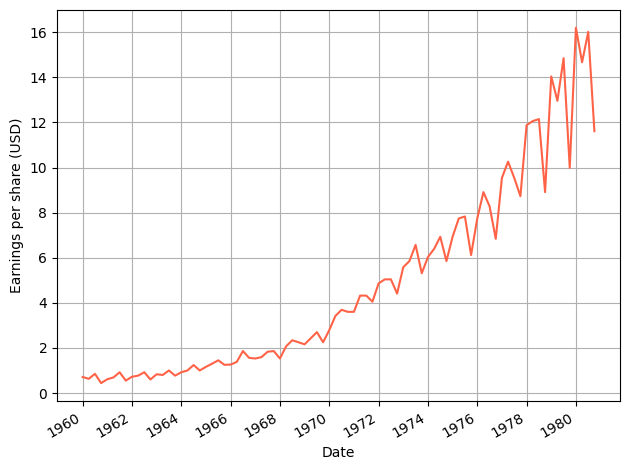

In [7]:
fig, ax = plt.subplots()

ax.plot(df.date, df['data'], color='tomato')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.grid(True)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

##### Aumented Dickey-Fulled Test

In [16]:
ad_fuller_result = adfuller(df['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 2.742016573457475
p-value: 1.0


##### Applying 1st order differencing

In [17]:
# Applying 1st order differencing
eps_diff = np.diff(df['data'], n=1)

# Stationarity Testing
ad_fuller_result = adfuller(eps_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.40740976363803183
p-value: 0.9088542416911329


##### Applying 2nd order differencing

In [18]:
# Applying 2nd order differencing
eps_diff2 = np.diff(eps_diff, n=1)

# Stationarity Testing
ad_fuller_result = adfuller(eps_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.5851628747931596
p-value: 0.006051099869603576


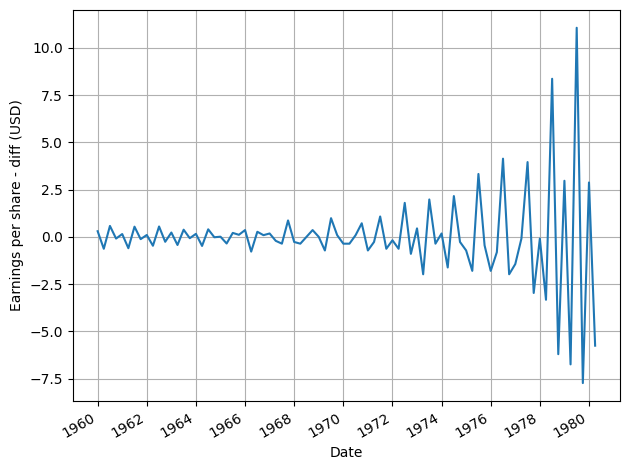

In [19]:
fig, ax = plt.subplots()

ax.plot(df['date'][2:], eps_diff2)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share - diff (USD)')
ax.grid(True)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

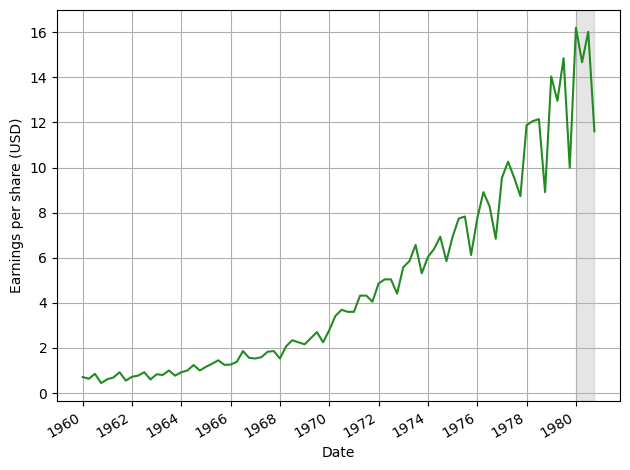

In [22]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data, color='forestgreen')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.grid(True)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

##### Full Unique ARIMA (p,d,q) Model Function

In [30]:
# def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
#     results = []
    
#     for order in tqdm_notebook(order_list):
#         try: 
#             model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
#         except:
#             continue
            
#         aic = model.aic
#         results.append([order, aic])
        
#     result_df = pd.DataFrame(results)
#     result_df.columns = ['(p,q)', 'AIC']
    
#     #Sort in ascending order, lower AIC is better
#     result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
#     return result_df

In [31]:
from tqdm.notebook import tqdm

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False, maxiter=500)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

##### Fitting ARIMA Combinations

In [32]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))

##### Splitting Procedure

In [33]:
train = df['data'][:-4]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

/Users/isisromero/anaconda3/envs/ml_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isisromero/anaconda3/envs/ml_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isisromero/anaconda3/envs/ml_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isisromero/anaconda3/envs/ml_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

,"(p,q)",AIC
0,"(3, 3)",115.266177
1,"(3, 1)",115.624981
2,"(3, 2)",115.672007
3,"(3, 0)",154.430623
4,"(0, 3)",194.654716
5,"(0, 2)",209.274551
6,"(2, 3)",220.666882
7,"(1, 3)",228.267645
8,"(1, 2)",228.935822
9,"(2, 2)",229.974688


##### Residuals Model Validation

In [36]:
model = SARIMAX(train, order=(3,2,3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:               SARIMAX(3, 2, 3)   Log Likelihood                 -50.636
Date:                Tue, 27 Feb 2024   AIC                            115.272
Time:                        10:22:08   BIC                            131.769
Sample:                             0   HQIC                           121.876
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9996      0.037    -27.148      0.000      -1.072      -0.927
ar.L2         -0.9875      0.040    -24.642      0.000      -1.066      -0.909
ar.L3         -0.9756      0.026    -37.444      0.0

/Users/isisromero/anaconda3/envs/ml_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/isisromero/anaconda3/envs/ml_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### Residuals Diagnose

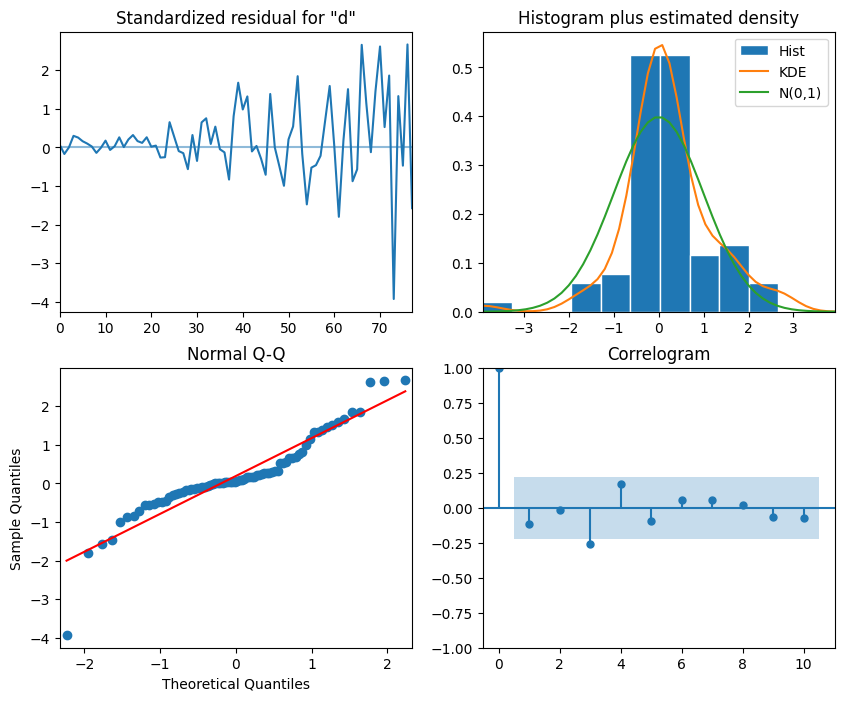

In [37]:
model_fit.plot_diagnostics(figsize=(10,8));

##### LJung-Box Test

In [40]:
# Running the Ljung-Box test on the residuals
results = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1))

# Accessing the p-values from the results dictionary
pvalues = results['lb_pvalue']

print(pvalues)

1     0.189893
2     0.422818
3     0.062896
4     0.054401
5     0.077865
6     0.118815
7     0.167680
8     0.236788
9     0.292742
10    0.342244
Name: lb_pvalue, dtype: float64


##### Setting Model's Benchmark

In [41]:
test = df.iloc[-4:]

test['naive_seasonal'] = df['data'].iloc[76:80].values
test

/var/folders/dk/f9pbhbp52qxc0613mpbtx8lm0000gn/T/ipykernel_89903/3007513500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_seasonal'] = df['data'].iloc[76:80].values


,date,data,naive_seasonal
80,1980-01-01,16.20,14.04
81,1980-04-01,14.67,12.96
82,1980-07-02,16.02,14.85
83,1980-10-01,11.61,9.99


#### Forecasting with ARIMA

In [42]:
ARIMA_pred = model_fit.get_prediction(80, 83).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

/var/folders/dk/f9pbhbp52qxc0613mpbtx8lm0000gn/T/ipykernel_89903/1028357784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred


,date,data,naive_seasonal,ARIMA_pred
80,1980-01-01,16.20,14.04,15.854993
81,1980-04-01,14.67,12.96,14.376496
82,1980-07-02,16.02,14.85,16.368254
83,1980-10-01,11.61,9.99,11.679093


##### ARIMA Visualization

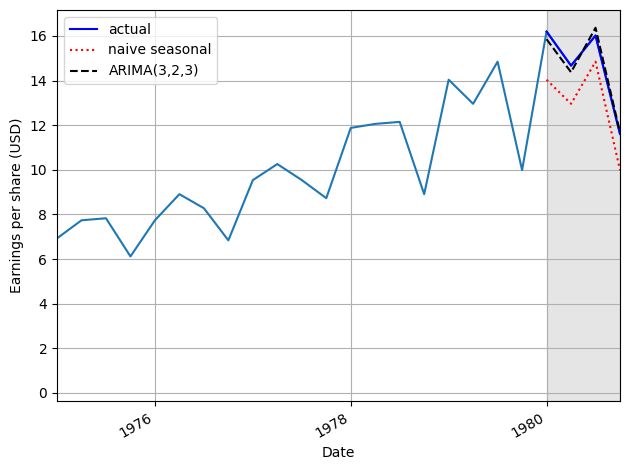

In [44]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.plot(test['data'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,3)')

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.grid(True)

ax.legend(loc=2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax.set_xlim(60, 83)

fig.autofmt_xdate()
plt.tight_layout()

##### Model's Mean Aboslute Error

In [46]:
# MAPE Function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
mape_naive_seasonal = mape(test['data'], test['naive_seasonal'])
mape_ARIMA = mape(test['data'], test['ARIMA_pred'])

print(mape_naive_seasonal, mape_ARIMA)

11.561658552433654 1.7248412393805048


Text(0.5, 1.0, 'MAPE Forecasting Method')

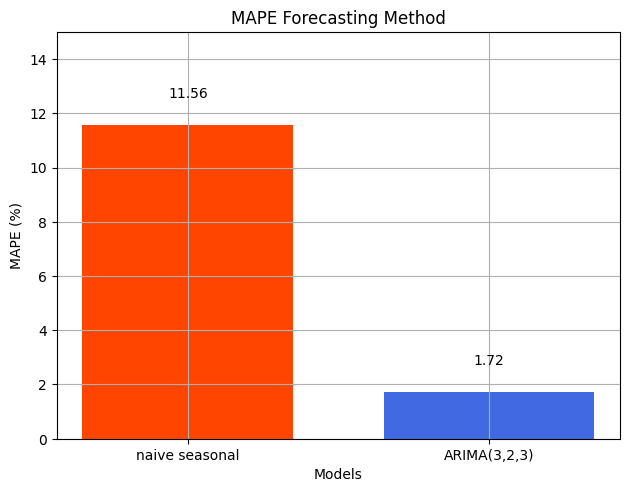

In [49]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(3,2,3)']
y = [mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.7, color=['orangered', 'royalblue'])
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)
ax.grid(True)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()
plt.title('MAPE Forecasting Method')